In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.tree import plot_tree
from sklearn.feature_selection import RFE


In [2]:
df = pd.read_csv("heart.csv")
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
dict_names = {
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'Chest_Pain',
    'trtbps': 'Resting_Pressure',
    'chol': 'Cholesterol',
    'fbs': 'Fasting_Blood_Sugar',
    'restecg': 'Resting_Ecg_Results',
    'thalachh': 'Maximum_Heart_Rate',
    'exng': 'Exercise_Induced_Angina',
    'oldpeak': 'Old_Peak',
    'slp': 'Slope',
    'caa': 'Major_Vessels',
    'thall': 'Thallium_Rate',
    'output': 'Target'
}

In [4]:
for column in df.columns:
    if column in dict_names:
        df.rename(columns={column: dict_names[column]}, inplace=True)
df.head()


,Age,Sex,Chest_Pain,Resting_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_Ecg_Results,Maximum_Heart_Rate,Exercise_Induced_Angina,Old_Peak,Slope,Major_Vessels,Thallium_Rate,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape


(303, 14)

In [6]:
df.describe()

,Age,Sex,Chest_Pain,Resting_Pressure,Cholesterol,Fasting_Blood_Sugar,Resting_Ecg_Results,Maximum_Heart_Rate,Exercise_Induced_Angina,Old_Peak,Slope,Major_Vessels,Thallium_Rate,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   Sex                      303 non-null    int64  
 2   Chest_Pain               303 non-null    int64  
 3   Resting_Pressure         303 non-null    int64  
 4   Cholesterol              303 non-null    int64  
 5   Fasting_Blood_Sugar      303 non-null    int64  
 6   Resting_Ecg_Results      303 non-null    int64  
 7   Maximum_Heart_Rate       303 non-null    int64  
 8   Exercise_Induced_Angina  303 non-null    int64  
 9   Old_Peak                 303 non-null    float64
 10  Slope                    303 non-null    int64  
 11  Major_Vessels            303 non-null    int64  
 12  Thallium_Rate            303 non-null    int64  
 13  Target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

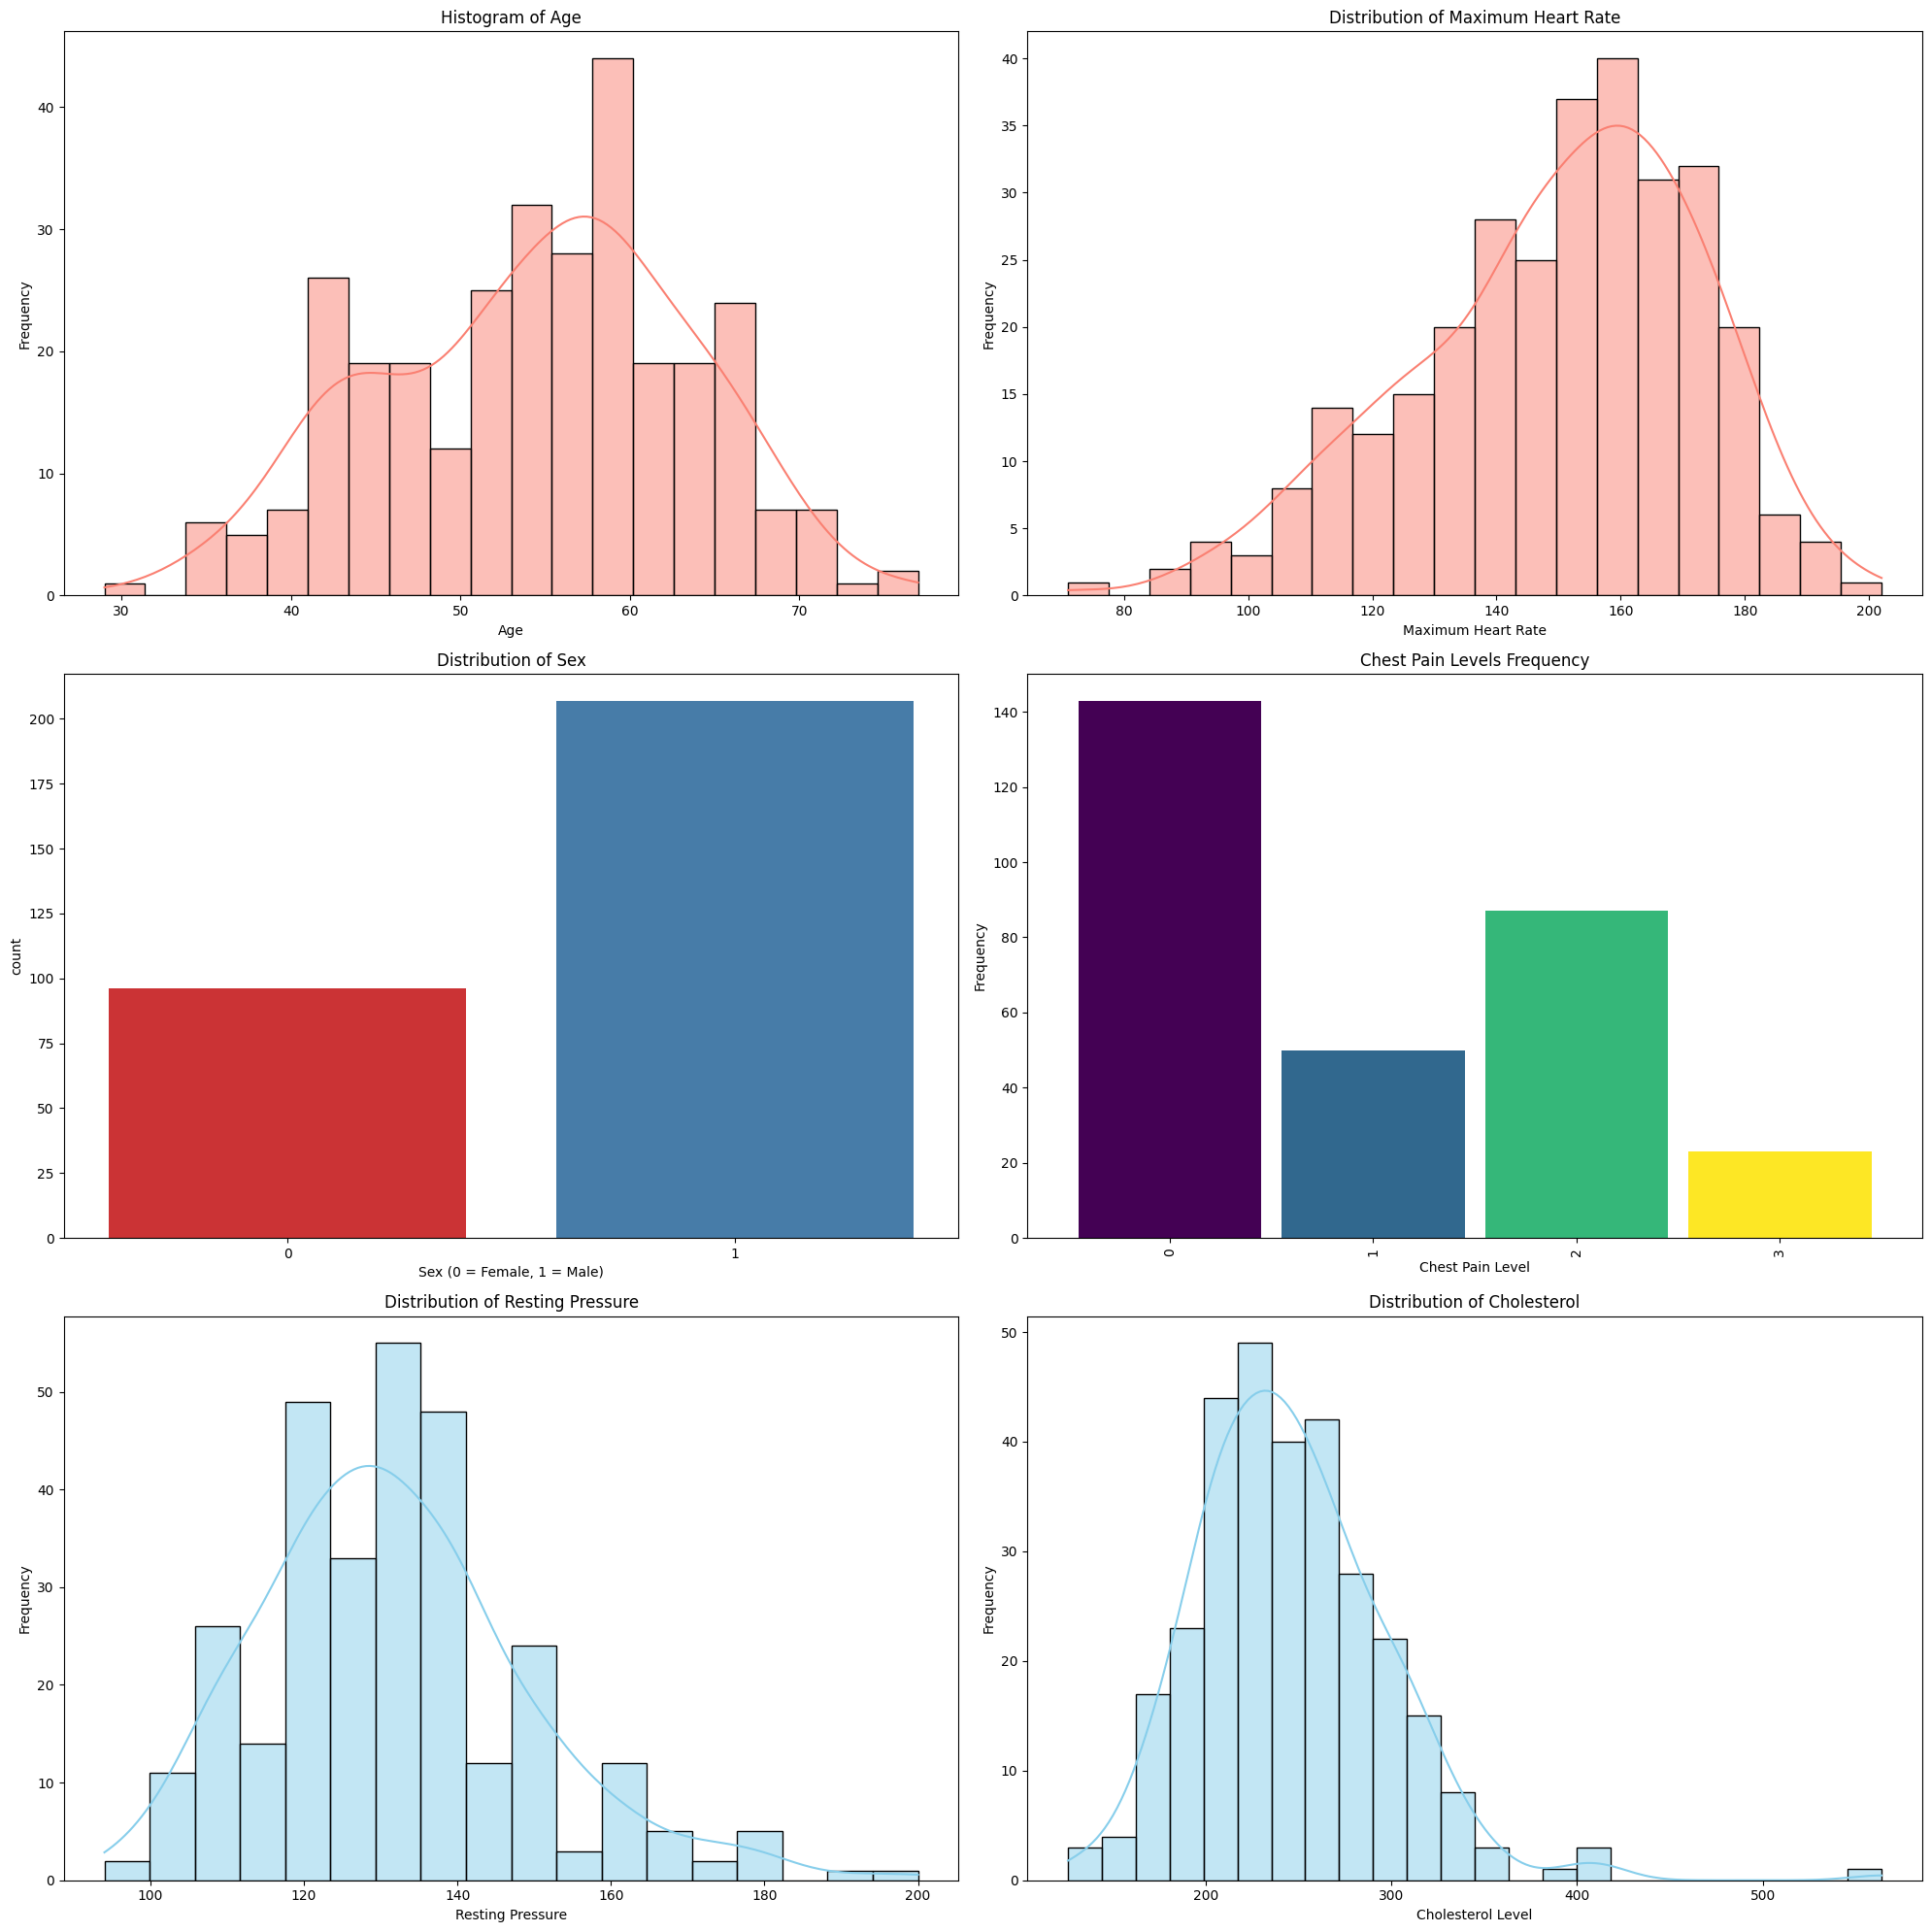

In [8]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='salmon')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

plt.subplot(3, 2, 2)
sns.histplot(df['Maximum_Heart_Rate'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Maximum Heart Rate')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Frequency')

plt.subplot(3, 2, 3)
sns.countplot(x='Sex', data=df, palette='Set1')
plt.xlabel('Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.title('Distribution of Sex')

plt.subplot(3, 2, 4)
chest_pain_counts = df['Chest_Pain'].value_counts().sort_index()
colors = plt.cm.viridis(np.linspace(0, 1, len(chest_pain_counts)))
ax = chest_pain_counts.plot(kind='bar', width=0.9, color=colors)
ax.set_title('Chest Pain Levels Frequency')
ax.set_xlabel('Chest Pain Level')
ax.set_ylabel('Frequency')

plt.subplot(3, 2, 5)
sns.histplot(df['Resting_Pressure'], kde=True, color='skyblue')
plt.title('Distribution of Resting Pressure')
plt.xlabel('Resting Pressure')
plt.ylabel('Frequency')

plt.subplot(3, 2, 6)
sns.histplot(df['Cholesterol'], kde=True, color='skyblue')
plt.title('Distribution of Cholesterol')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


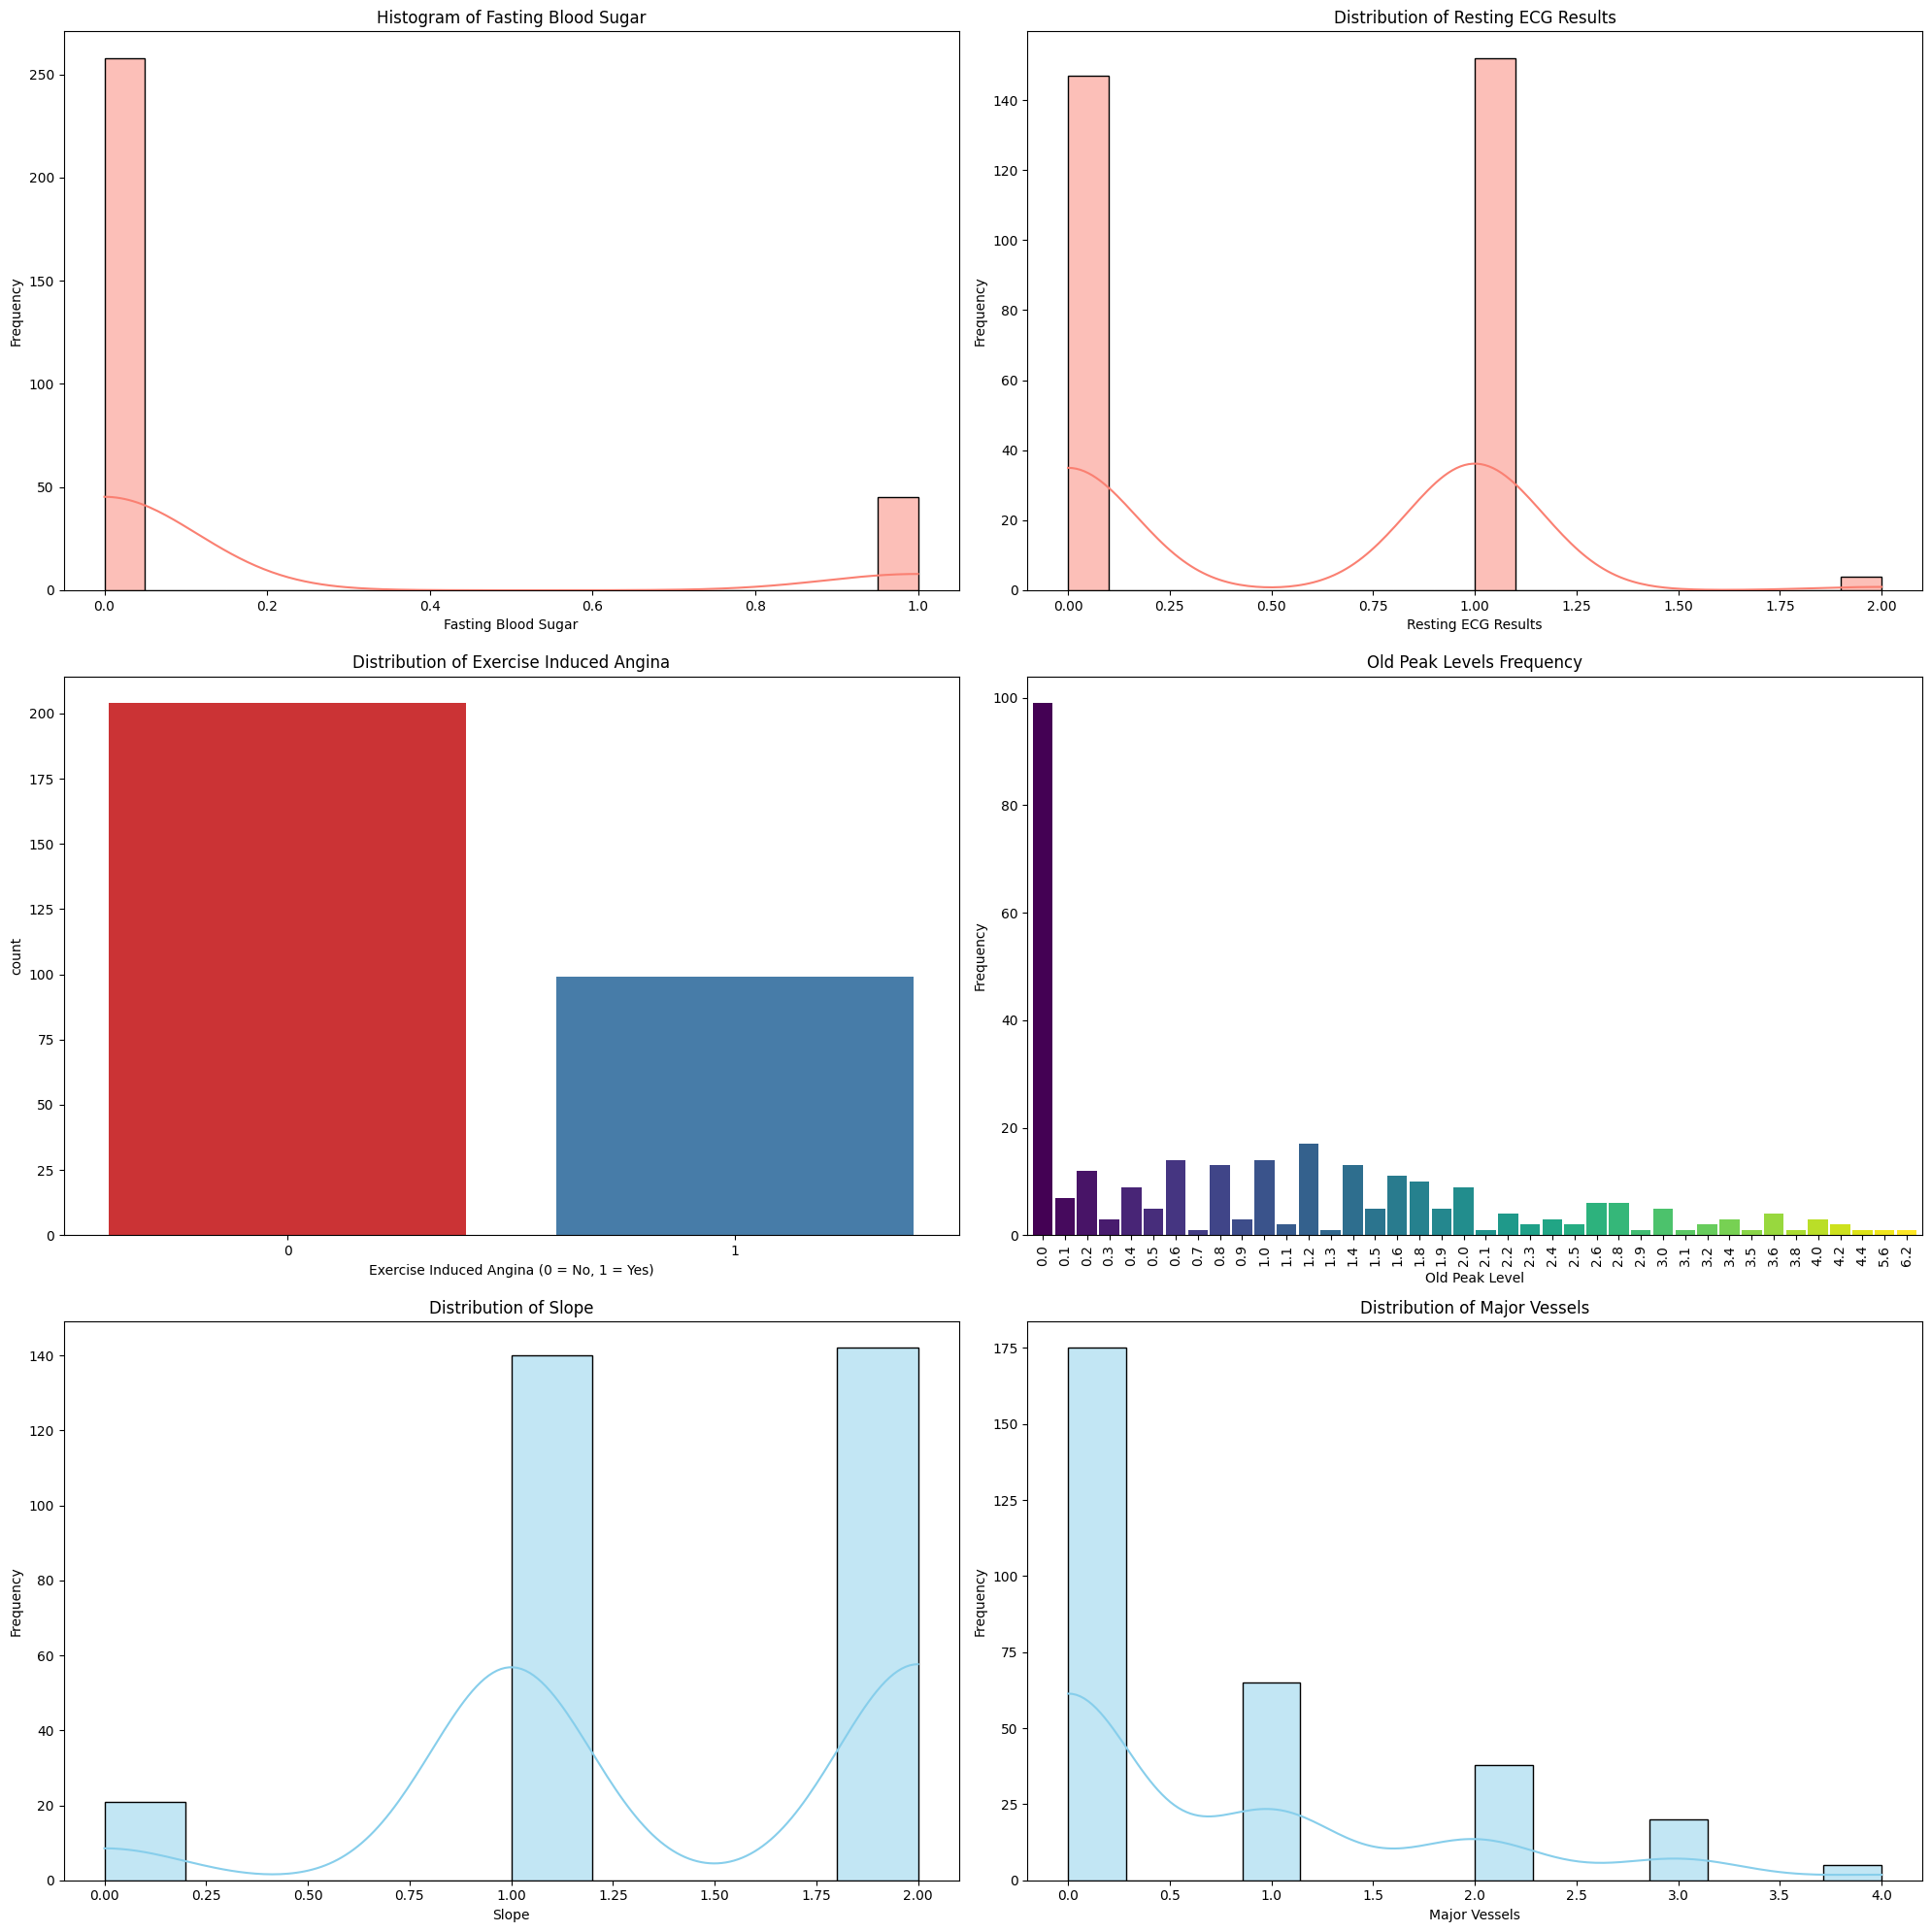

In [9]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
sns.histplot(df['Fasting_Blood_Sugar'], bins=20, kde=True, color='salmon')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Frequency')
plt.title('Histogram of Fasting Blood Sugar')

plt.subplot(3, 2, 2)
sns.histplot(df['Resting_Ecg_Results'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Resting ECG Results')
plt.xlabel('Resting ECG Results')
plt.ylabel('Frequency')

plt.subplot(3, 2, 3)
sns.countplot(x='Exercise_Induced_Angina', data=df, palette='Set1')
plt.xlabel('Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina (0 = No, 1 = Yes)')
plt.title('Distribution of Exercise Induced Angina')

plt.subplot(3, 2, 4)
old_peak_counts = df['Old_Peak'].value_counts().sort_index()
colors = plt.cm.viridis(np.linspace(0, 1, len(old_peak_counts)))
ax = old_peak_counts.plot(kind='bar', width=0.9, color=colors)
ax.set_title('Old Peak Levels Frequency')
ax.set_xlabel('Old Peak Level')
ax.set_ylabel('Frequency')

plt.subplot(3, 2, 5)
sns.histplot(df['Slope'], kde=True, color='skyblue')
plt.title('Distribution of Slope')
plt.xlabel('Slope')
plt.ylabel('Frequency')

plt.subplot(3, 2, 6)
sns.histplot(df['Major_Vessels'], kde=True, color='skyblue')
plt.title('Distribution of Major Vessels')
plt.xlabel('Major Vessels')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [10]:
cat_cols = ['Sex','Exercise_Induced_Angina','Major_Vessels','Chest_Pain','Fasting_Blood_Sugar','Resting_Ecg_Results','Slope','Thallium_Rate']
con_cols = ["Age","Resting_Pressure","Cholesterol","Maximum_Heart_Rate","Old_Peak"]
target_col = ["Target"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['Sex', 'Exercise_Induced_Angina', 'Major_Vessels', 'Chest_Pain', 'Fasting_Blood_Sugar', 'Resting_Ecg_Results', 'Slope', 'Thallium_Rate']
The continuous cols are :  ['Age', 'Resting_Pressure', 'Cholesterol', 'Maximum_Heart_Rate', 'Old_Peak']
The target variable is :   ['Target']


In [11]:
df_corr = df[con_cols].corr().transpose()
df_corr

,Age,Resting_Pressure,Cholesterol,Maximum_Heart_Rate,Old_Peak
Age,1.000000,0.279351,0.213678,-0.398522,0.210013
Resting_Pressure,0.279351,1.000000,0.123174,-0.046698,0.193216
Cholesterol,0.213678,0.123174,1.000000,-0.009940,0.053952
Maximum_Heart_Rate,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
Old_Peak,0.210013,0.193216,0.053952,-0.344187,1.000000


In [12]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df.head()

,Age,Resting_Pressure,Cholesterol,Maximum_Heart_Rate,Old_Peak,Target,Sex_1,Exercise_Induced_Angina_1,Major_Vessels_1,Major_Vessels_2,...,Chest_Pain_2,Chest_Pain_3,Fasting_Blood_Sugar_1,Resting_Ecg_Results_1,Resting_Ecg_Results_2,Slope_1,Slope_2,Thallium_Rate_1,Thallium_Rate_2,Thallium_Rate_3
0,63,145,233,150,2.3,1,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        303 non-null    int64  
 1   Resting_Pressure           303 non-null    int64  
 2   Cholesterol                303 non-null    int64  
 3   Maximum_Heart_Rate         303 non-null    int64  
 4   Old_Peak                   303 non-null    float64
 5   Target                     303 non-null    int64  
 6   Sex_1                      303 non-null    uint8  
 7   Exercise_Induced_Angina_1  303 non-null    uint8  
 8   Major_Vessels_1            303 non-null    uint8  
 9   Major_Vessels_2            303 non-null    uint8  
 10  Major_Vessels_3            303 non-null    uint8  
 11  Major_Vessels_4            303 non-null    uint8  
 12  Chest_Pain_1               303 non-null    uint8  
 13  Chest_Pain_2               303 non-null    uint8  

In [14]:
df = df[[col for col in df.columns if col != 'Target'] + ['Target']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        303 non-null    int64  
 1   Resting_Pressure           303 non-null    int64  
 2   Cholesterol                303 non-null    int64  
 3   Maximum_Heart_Rate         303 non-null    int64  
 4   Old_Peak                   303 non-null    float64
 5   Sex_1                      303 non-null    uint8  
 6   Exercise_Induced_Angina_1  303 non-null    uint8  
 7   Major_Vessels_1            303 non-null    uint8  
 8   Major_Vessels_2            303 non-null    uint8  
 9   Major_Vessels_3            303 non-null    uint8  
 10  Major_Vessels_4            303 non-null    uint8  
 11  Chest_Pain_1               303 non-null    uint8  
 12  Chest_Pain_2               303 non-null    uint8  
 13  Chest_Pain_3               303 non-null    uint8  

In [15]:
X = df.drop('Target', axis=1)
y = df['Target']

In [16]:
X.shape

(303, 22)

In [17]:
y.shape

(303,)

In [18]:
seed = 24
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

In [19]:
# Create a column transformer to apply StandardScaler to specific columns
col_trans = ColumnTransformer([('scaler', StandardScaler(), [0, 1, 2, 3, 4])], remainder='passthrough')

# Create a pipeline with the column transformer and a decision tree classifier
pipe = Pipeline(steps=[('prep', col_trans), ('model', DecisionTreeClassifier(random_state= seed))])

# Define the parameter grid for grid search
params = {'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
          'model__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Create a GridSearchCV object with the pipeline and parameter grid
grid = GridSearchCV(pipe, params, cv=5, n_jobs=-1, verbose=1,return_train_score= True)

# Fit the grid search object to the training data
grid.fit(X_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         [0, 1,
                                                                          2, 3,
                                                                          4])])),
                                       ('model',
                                        DecisionTreeClassifier(random_state=24))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10]},
             return_train_score=True, verbose=1)

In [20]:
grid.best_params_

{'model__max_depth': 3, 'model__min_samples_split': 10}

In [21]:
d = pd.DataFrame(grid.cv_results_)
d.head(50)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015074,0.001929,0.008967,0.001601,2,2,"{'model__max_depth': 2, 'model__min_samples_sp...",0.714286,0.734694,0.750000,...,0.748129,0.025410,10,0.782383,0.792746,0.804124,0.783505,0.788660,0.790284,0.007856
1,0.012385,0.001705,0.008392,0.001278,2,3,"{'model__max_depth': 2, 'model__min_samples_sp...",0.714286,0.734694,0.750000,...,0.748129,0.025410,10,0.782383,0.792746,0.804124,0.783505,0.788660,0.790284,0.007856
2,0.010947,0.000412,0.007623,0.000717,2,4,"{'model__max_depth': 2, 'model__min_samples_sp...",0.714286,0.734694,0.750000,...,0.748129,0.025410,10,0.782383,0.792746,0.804124,0.783505,0.788660,0.790284,0.007856
3,0.012177,0.001650,0.006693,0.000144,2,5,"{'model__max_depth': 2, 'model__min_samples_sp...",0.714286,0.734694,0.750000,...,0.748129,0.025410,10,0.782383,0.792746,0.804124,0.783505,0.788660,0.790284,0.007856
4,0.010955,0.000493,0.006791,0.000299,2,6,"{'model__max_depth': 2, 'model__min_samples_sp...",0.714286,0.734694,0.750000,...,0.748129,0.025410,10,0.782383,0.792746,0.804124,0.783505,0.788660,0.790284,0.007856
5,0.011663,0.002058,0.011703,0.006486,2,7,"{'model__max_depth': 2, 'model__min_samples_sp...",0.714286,0.734694,0.750000,...,0.748129,0.025410,10,0.782383,0.792746,0.804124,0.783505,0.788660,0.790284,0.007856
6,0.011457,0.002327,0.009828,0.006088,2,8,"{'model__max_depth': 2, 'model__min_samples_sp...",0.714286,0.734694,0.750000,...,0.748129,0.025410,10,0.782383,0.792746,0.804124,0.783505,0.788660,0.790284,0.007856
7,0.010659,0.000984,0.007774,0.002506,2,9,"{'model__max_depth': 2, 'model__min_samples_sp...",0.714286,0.734694,0.750000,...,0.748129,0.025410,10,0.782383,0.792746,0.804124,0.783505,0.788660,0.790284,0.007856
8,0.012435,0.003847,0.009057,0.004882,2,10,"{'model__max_depth': 2, 'model__min_samples_sp...",0.714286,0.734694,0.750000,...,0.748129,0.025410,10,0.782383,0.792746,0.804124,0.783505,0.788660,0.790284,0.007856
9,0.011334,0.000554,0.006968,0.000232,3,2,"{'model__max_depth': 3, 'model__min_samples_sp...",0.693878,0.734694,0.791667,...,0.756548,0.037619,2,0.854922,0.834197,0.860825,0.840206,0.814433,0.840917,0.016368


In [22]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, grid.predict(X_test))
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid.predict(X_test))
# Calculate the specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
# Calculate the sensitivity
sensitivity = tp / (tp + fn)
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)


Confusion Matrix:
[[20  9]
 [ 4 28]]
Accuracy: 0.7868852459016393
Specificity: 0.6896551724137931
Sensitivity: 0.875


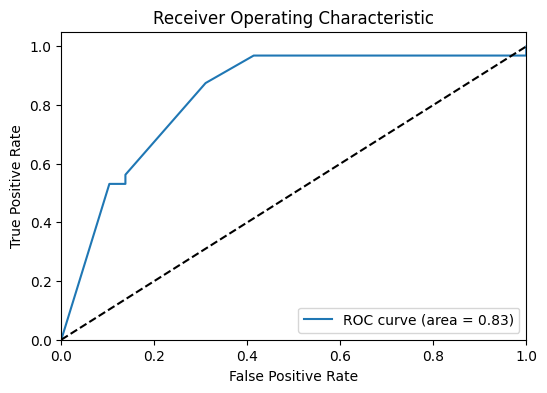

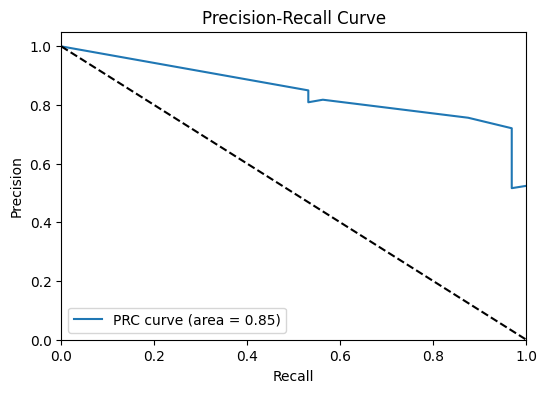

In [23]:

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, grid.predict_proba(X_test)[:, 1])

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Calculate the precision, recall, and thresholds for the PRC curve
precision, recall, thresholds = precision_recall_curve(y_test, grid.predict_proba(X_test)[:, 1])
prc_auc = auc(recall, precision)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the PRC curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label='PRC curve (area = %0.2f)' % prc_auc)
plt.plot([0, 1], [1, 0], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


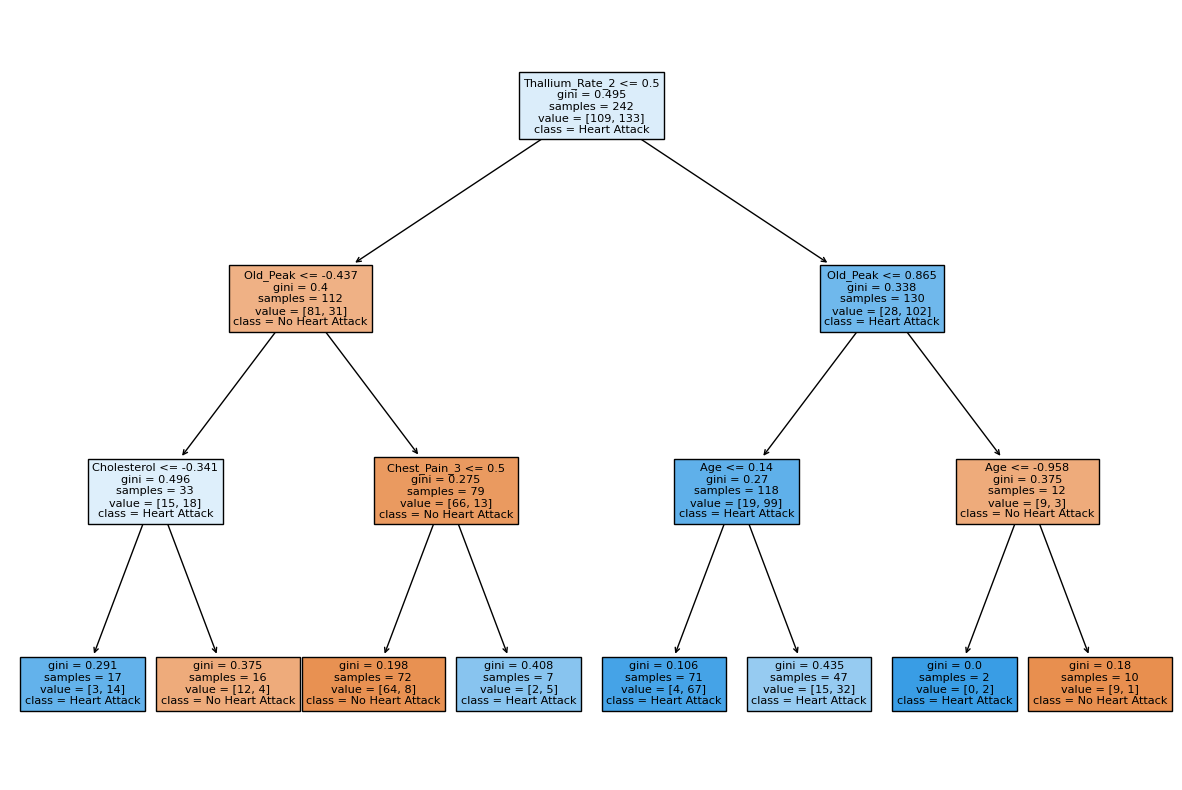

In [24]:


# Get the best estimator from the grid search
best_estimator = grid.best_estimator_

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(best_estimator['model'], filled=True, feature_names=X_train.columns, class_names=['No Heart Attack', 'Heart Attack'])
plt.show()


In [25]:

col_trans = ColumnTransformer([('scaler', StandardScaler(), [0, 1, 2, 3, 4])], remainder='passthrough')

# Create a pipeline with the column transformer and a random forest classifier
pipe = Pipeline(steps=[('prep', col_trans), ('model', RandomForestClassifier(random_state=seed))])

# Define the parameter grid for grid search
params = {'model__n_estimators': [100, 200, 300],
          'model__max_depth': [2, 3, 4],
          'model__min_samples_split': [8, 9, 10]}

# Create a GridSearchCV object with the pipeline and parameter grid
grid = GridSearchCV(pipe, params, cv=5, n_jobs=-1, verbose=1,return_train_score= True)

# Fit the grid search object to the training data
grid.fit(X_train, y_train)

grid.best_params_
d = pd.DataFrame(grid.cv_results_)
d.head(50)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.266610,0.005586,0.016502,0.001255,2,8,100,"{'model__max_depth': 2, 'model__min_samples_sp...",0.714286,0.836735,...,0.801871,0.052105,12,0.849741,0.823834,0.835052,0.829897,0.835052,0.834715,0.008575
1,0.536622,0.012808,0.024116,0.000772,2,8,200,"{'model__max_depth': 2, 'model__min_samples_sp...",0.734694,0.795918,...,0.797789,0.042785,17,0.849741,0.823834,0.850515,0.829897,0.829897,0.836777,0.011127
2,0.775239,0.018374,0.032444,0.001560,2,8,300,"{'model__max_depth': 2, 'model__min_samples_sp...",0.734694,0.795918,...,0.793622,0.032909,22,0.839378,0.818653,0.845361,0.850515,0.829897,0.836761,0.011358
3,0.270347,0.009371,0.016192,0.000350,2,9,100,"{'model__max_depth': 2, 'model__min_samples_sp...",0.714286,0.836735,...,0.801871,0.052105,12,0.849741,0.823834,0.835052,0.829897,0.835052,0.834715,0.008575
4,0.523275,0.015876,0.025346,0.001515,2,9,200,"{'model__max_depth': 2, 'model__min_samples_sp...",0.734694,0.795918,...,0.797789,0.042785,17,0.849741,0.823834,0.850515,0.829897,0.829897,0.836777,0.011127
5,1.035709,0.280445,0.041192,0.014206,2,9,300,"{'model__max_depth': 2, 'model__min_samples_sp...",0.734694,0.795918,...,0.793622,0.032909,22,0.839378,0.818653,0.845361,0.850515,0.829897,0.836761,0.011358
6,0.457419,0.052177,0.027223,0.009657,2,10,100,"{'model__max_depth': 2, 'model__min_samples_sp...",0.714286,0.836735,...,0.801871,0.052105,12,0.849741,0.823834,0.835052,0.829897,0.835052,0.834715,0.008575
7,0.540531,0.037760,0.024542,0.000466,2,10,200,"{'model__max_depth': 2, 'model__min_samples_sp...",0.734694,0.795918,...,0.797789,0.042785,17,0.849741,0.823834,0.850515,0.829897,0.829897,0.836777,0.011127
8,0.773444,0.016801,0.034012,0.002269,2,10,300,"{'model__max_depth': 2, 'model__min_samples_sp...",0.734694,0.795918,...,0.789456,0.034187,26,0.839378,0.818653,0.845361,0.850515,0.829897,0.836761,0.011358
9,0.267540,0.007578,0.017233,0.001310,3,8,100,"{'model__max_depth': 3, 'model__min_samples_sp...",0.714286,0.836735,...,0.797704,0.050221,21,0.875648,0.865285,0.865979,0.865979,0.855670,0.865712,0.006323


In [26]:


# Calculate the confusion matrix
cm = confusion_matrix(y_test, grid.predict(X_test))
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid.predict(X_test))
# Calculate the specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
# Calculate the sensitivity
sensitivity = tp / (tp + fn)
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)


Confusion Matrix:
[[23  6]
 [ 3 29]]
Accuracy: 0.8524590163934426
Specificity: 0.7931034482758621
Sensitivity: 0.90625


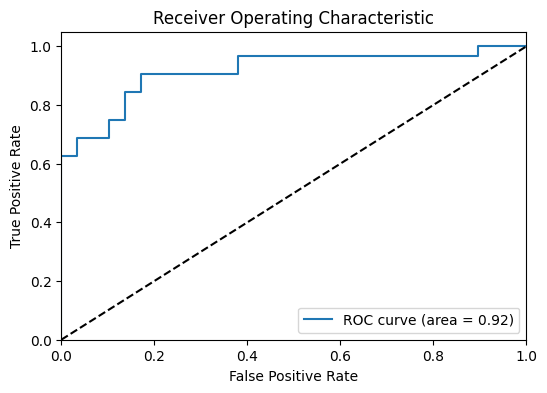

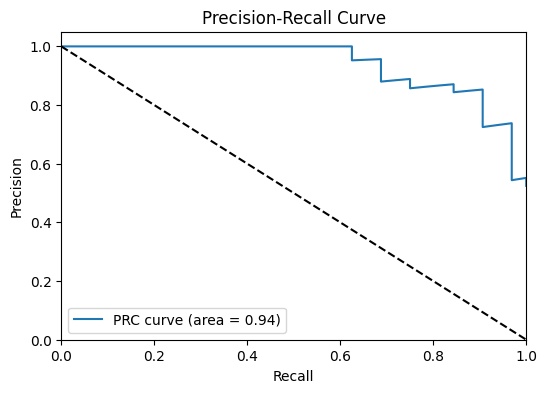

In [27]:

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, grid.predict_proba(X_test)[:, 1])

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Calculate the precision, recall, and thresholds for the PRC curve
precision, recall, thresholds = precision_recall_curve(y_test, grid.predict_proba(X_test)[:, 1])
prc_auc = auc(recall, precision)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the PRC curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label='PRC curve (area = %0.2f)' % prc_auc)
plt.plot([0, 1], [1, 0], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


In [30]:


# Create a column transformer to apply StandardScaler to specific columns
col_trans = ColumnTransformer([('scaler', StandardScaler(), [0, 1, 2, 3, 4])], remainder='passthrough')

# Create a pipeline with the column transformer, feature selection, and decision tree classifier
pipe = Pipeline(steps=[('prep', col_trans), ('feature_selection', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)), ('model', DecisionTreeClassifier(random_state=seed))])

# Define the parameter grid for grid search
params = {'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
          'model__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Create a GridSearchCV object with the pipeline and parameter grid
grid = GridSearchCV(pipe, params, cv=5, n_jobs=-1, verbose=1, return_train_score=True)

# Fit the grid search object to the training data
grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         [0, 1,
                                                                          2, 3,
                                                                          4])])),
                                       ('feature_selection',
                                        RFE(estimator=DecisionTreeClassifier(),
                                            n_features_to_select=5)),
                                       ('model',
                                        DecisionTreeClassifier(random_state=24))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10]},
             return_train_score=True, verbose=1)

In [31]:


# Calculate the confusion matrix
cm = confusion_matrix(y_test, grid.predict(X_test))
# Calculate the accuracy
accuracy = accuracy_score(y_test, grid.predict(X_test))
# Calculate the specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
# Calculate the sensitivity
sensitivity = tp / (tp + fn)
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)


Confusion Matrix:
[[20  9]
 [ 5 27]]
Accuracy: 0.7704918032786885
Specificity: 0.6896551724137931
Sensitivity: 0.84375


In [48]:
print(grid.best_estimator_.named_steps['feature_selection'].support_)
selected = grid.best_estimator_.named_steps['feature_selection'].support_

[ True  True  True False  True False False False False False False False
 False False False False False False False False  True False]


In [49]:
print(X_train.columns.values[selected])

['Age' 'Resting_Pressure' 'Cholesterol' 'Old_Peak' 'Thallium_Rate_2']
